## Acquire the Data

I downloaded the dataset from https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data which is the data obtained from GIS (Geographic Information System) in 2004. The dataset contains several features, however, we will be using a limited number as the rest do not add impact to the target variable.

In [12]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
#import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [13]:
df.shape

(194673, 38)

In [16]:
df.shape[1]

38

In [17]:
df.shape[0]

194673

In [18]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [19]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [27]:
#Missing Values
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [28]:
#Bar Plot
def bar_plot(data_column, x_label, y_label, title, size=(10,6), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot(x = codes, y=count)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=22)
    plt.xticks(rotation=rotate)
    plt.show()

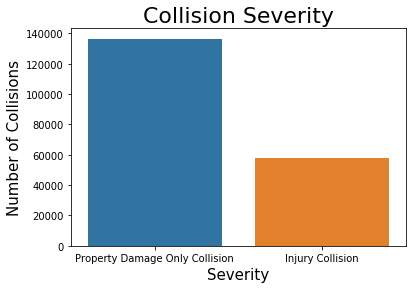

In [29]:
#Bar Plot of Number of Collision by Type
bar_plot(df['SEVERITYDESC'], 'Severity', 'Number of Collisions', 'Collision Severity', size=(6,4)) 

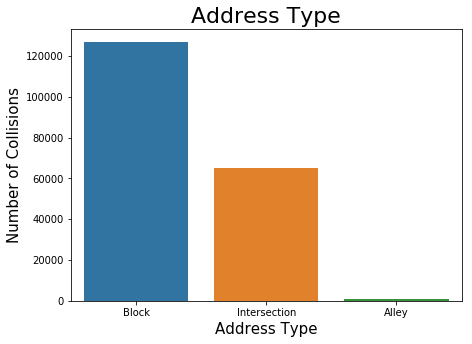

In [30]:
#Bar Plot of Number of Collisions by Address Type
bar_plot(df['ADDRTYPE'], 'Address Type', 'Number of Collisions', 'Address Type', size=(7,5))

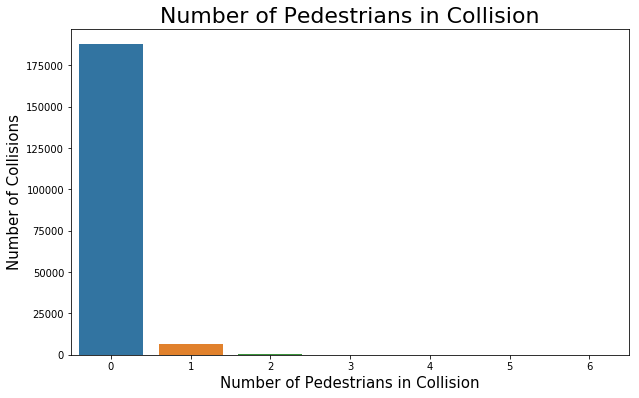

In [32]:
#Number of Pedestrian per Collision
bar_plot(df['PEDCOUNT'], 'Number of Pedestrians in Collision', 'Number of Collisions', 'Number of Pedestrians in Collision')

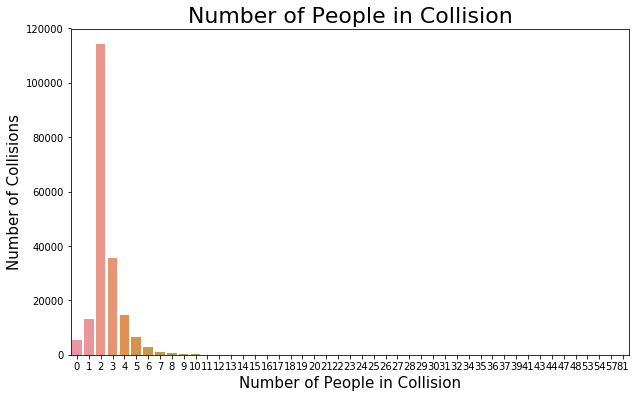

In [33]:
#Number of People per Collision
bar_plot(df['PERSONCOUNT'], 'Number of People in Collision', 'Number of Collisions', 'Number of People in Collision')

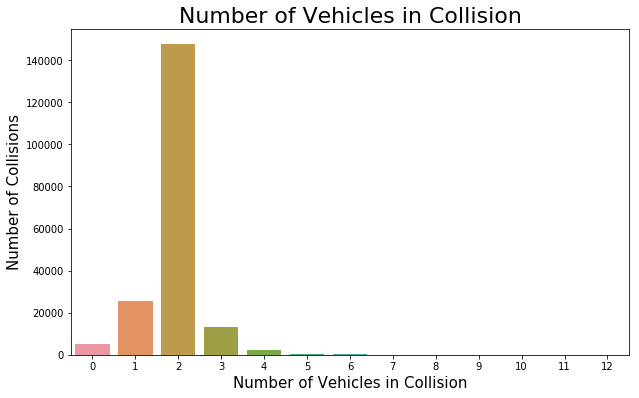

In [31]:
#Bar Plot Number of Vehicles per Collisions 
bar_plot(df['VEHCOUNT'], 'Number of Vehicles in Collision', 'Number of Collisions', 'Number of Vehicles in Collision')

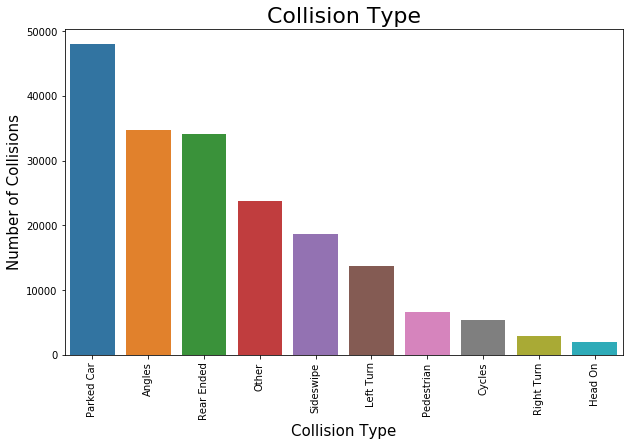

In [34]:
#Collisions by Type
bar_plot(df['COLLISIONTYPE'], 'Collision Type', 'Number of Collisions', 'Collision Type', rotate=90)

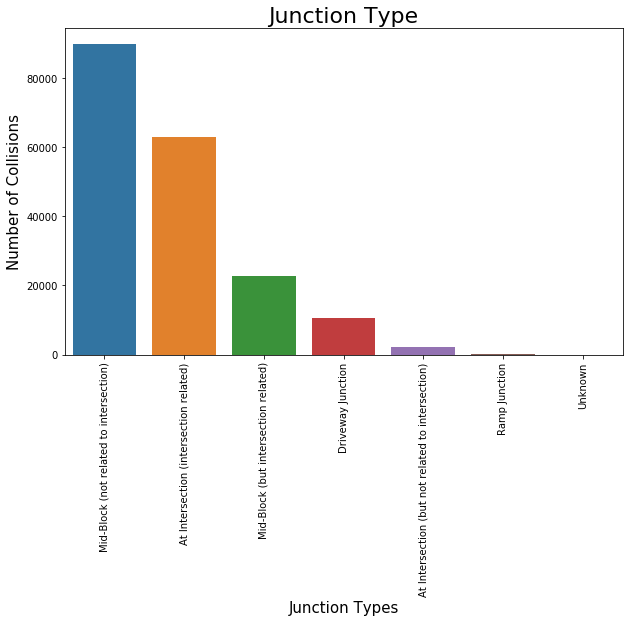

In [35]:
#Collisions by Junction Type
bar_plot(df['JUNCTIONTYPE'], 'Junction Types', 'Number of Collisions', 'Junction Type', rotate=90)

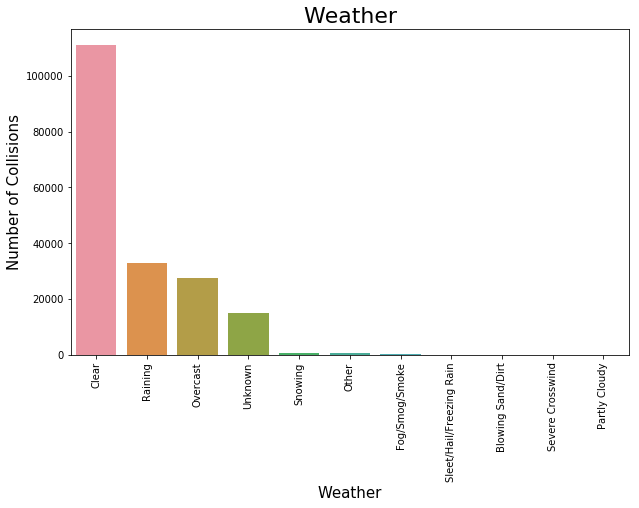

In [36]:
#Collisions in different Types of Weather 
bar_plot(df['WEATHER'], 'Weather', 'Number of Collisions', 'Weather', rotate=90)

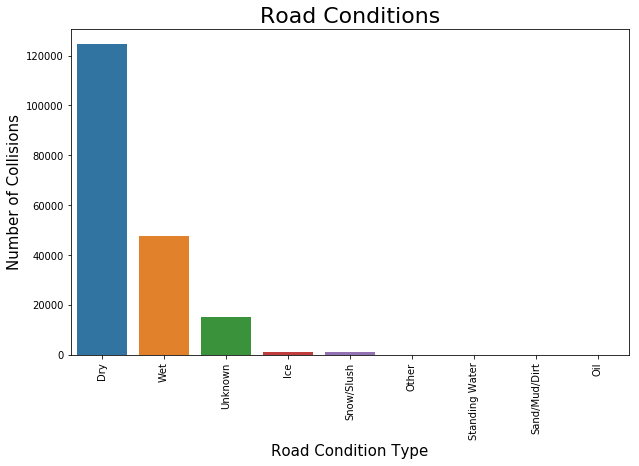

In [37]:
#Collisions by Road Conditions
bar_plot(df['ROADCOND'], 'Road Condition Type', 'Number of Collisions', 'Road Conditions', rotate=90)

In [38]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['Year'] = df['INCDTTM'].dt.year
df['Month'] = df['INCDTTM'].dt.month
df['Day'] = df['INCDTTM'].dt.weekday

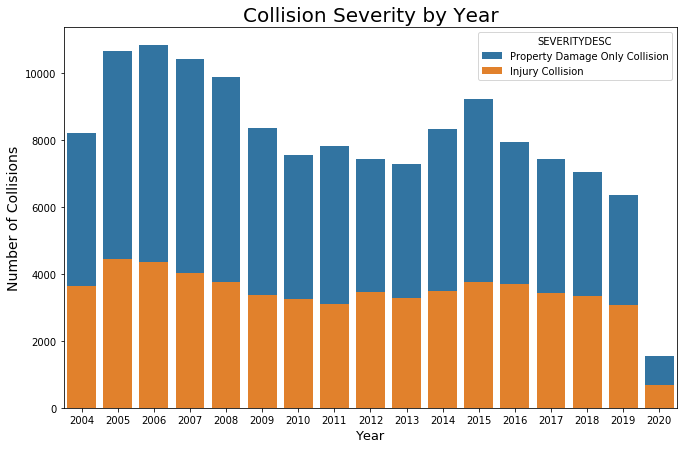

In [39]:
#Collision Severity by Year
plt.figure(figsize=(11,7))
ax = sns.countplot(x='Year', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Number of Collisions', fontsize=14)
ax.set_title('Collision Severity by Year', fontsize=20);

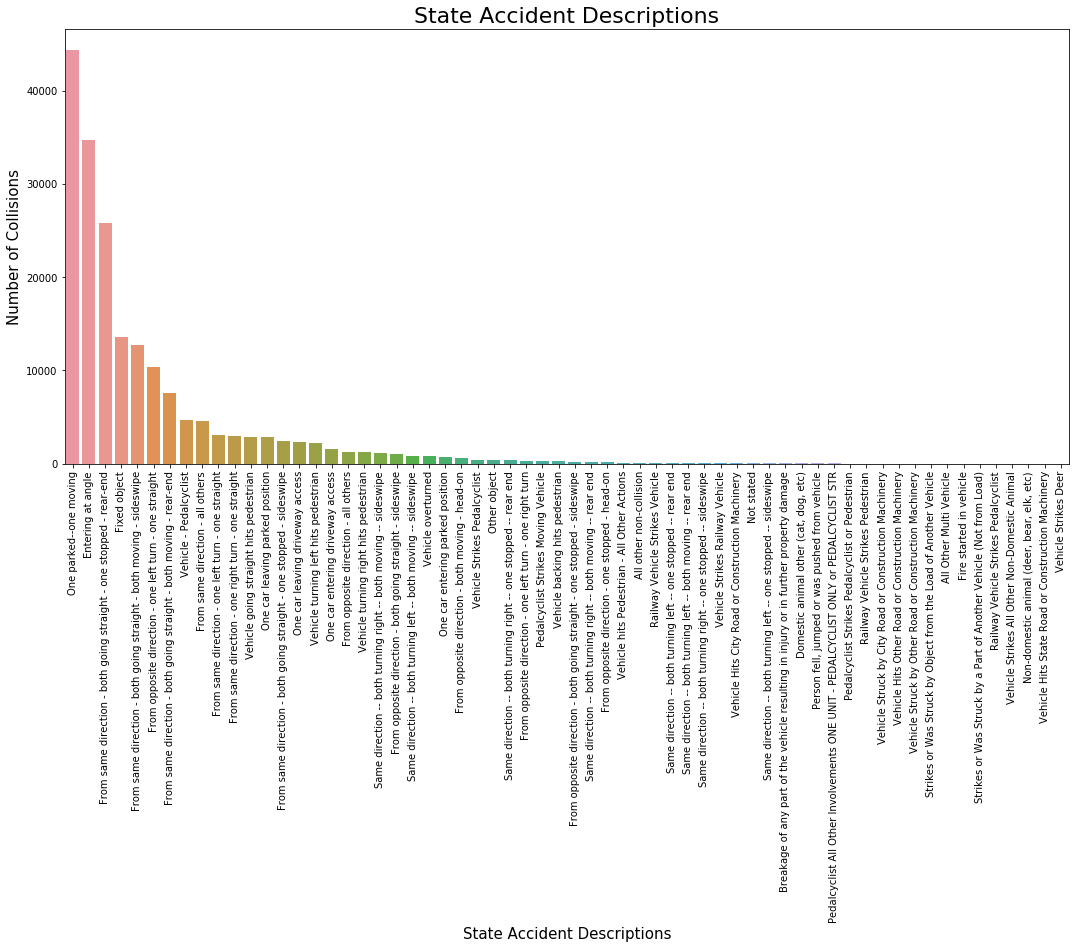

In [40]:
#Accident description 
bar_plot(df['ST_COLDESC'], 'State Accident Descriptions', 'Number of Collisions', 'State Accident Descriptions', size=(18,8), rotate=90)

##### Conclusion: 
1. Most accidents involve property rather than injuries
2. Most accidents occure on a block rather than intersection 
3. Pedestrians are rarely affected by accidents
4. Accidents involve 2 vehicles (and 2 people)  most of the time (followed by 3 people)
5. Highest number of collisions occur with parked cars
6. The weather does not seem to impact car accidents 
7. Highest number of accidents mostly occur when: 1 car is moving the other parked, Entering at angle & rear end crashes.

